In [389]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
#df = pd.read_csv("C:\\Users\\Peter\\Desktop\\student-por.csv", low_memory = False) 
df = pd.read_csv("C:\\Users\\Peter\\Desktop\\student-mat.csv", low_memory = False) 

In [390]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [391]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [321]:
df.isnull().values.any()  #check for missing data

False

In [322]:
def checksignificance (type1, type2):  #takes 2 dataframes
    print("Difference of the means of the two datasets")
    #creates an array of items who have columns in the Dataframe we want to check correlation for 
    parameters = ['Medu', 'Fedu', 'Dalc', 'Walc', 'absences', 'freetime', 'famrel', 'failures','goout','studytime', 'traveltime', 'G1', 'G2', 'G3']
    
    for item in parameters:
        diff = type1[item].mean()- type2[item].mean()  #finds the difference between the two input dataframes for individual parameters in the array  
        if diff < -1 or diff > 1:                     #if the difference is greater than 1
            print(item, diff, '<--- SIGNIFICANT')    #print significant in all caps to get attention
        elif diff < -0.5 or diff > 0.5:             #if the difference is greater than .5
            print(item, diff, '<--- potentially significant')   #print 'potentially significant' next to results
        else :
            print(item, diff)                       #for small differences just print the results

In [323]:
def checkp (type1, type2):
    print ()
    print("T-Statistic and pvalue for interesting data")

    parameters = ['Medu', 'Fedu', 'Dalc', 'Walc', 'absences', 'freetime', 'famrel', 'failures','goout','studytime', 'traveltime', 'G1', 'G2', 'G3']
    
    for item in parameters:
        ptest = ttest_ind(type1[item], type2[item], equal_var=False).pvalue
        if ptest < 0.01:
            print(item, ttest_ind(type1[item], type2[item], equal_var=False))

In [372]:
def histvsdata(set1,set1title, set2,set2title, plottitle,plotdata):
    plt.figure(figsize=(5,10))
    plt.subplot(2, 1, 1)
    plt.hist(set1[plotdata], label = set1title, alpha = 0.5, normed = True)
    plt.title(plottitle)
    plt.hist(set2[plotdata], label = set2title, alpha = 0.5, normed = True)
    plt.legend(loc='upper left')
    plt.show()

In [325]:
travelslonger = df[df['traveltime']>=df['traveltime'].mean()] #create a dataframe of students who goesout more than the mean
travelsshorter = df[df['traveltime']<df['traveltime'].mean()] #create a dataframe of students who goesout less than the mean
checksignificance(travelslonger,travelsshorter)
checkp(travelslonger,travelsshorter)

Difference of the means of the two datasets
Medu -0.555417173531 <--- potentially significant
Fedu -0.474791944235
Dalc 0.105553302825
Walc 0.0603892718531
absences 0.0148390584873
freetime -0.0189132827434
famrel -0.102618316631
failures 0.139151171098
goout 0.0543455173879
studytime -0.121415744656
traveltime 1.3038869258 <--- SIGNIFICANT
G1 -0.826700650717 <--- potentially significant
G2 -0.772828206762 <--- potentially significant
G3 -0.792002162621 <--- potentially significant

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=-6.3676143501206077, pvalue=3.7974240498612439e-10)
Fedu Ttest_indResult(statistic=-5.5735226098079957, pvalue=3.7640434172468823e-08)
failures Ttest_indResult(statistic=2.8599197213003329, pvalue=0.0044184697944714751)
traveltime Ttest_indResult(statistic=38.430934992093142, pvalue=4.1583928411017004e-114)
G1 Ttest_indResult(statistic=-3.8318785162499696, pvalue=0.00014060162575948789)
G2 Ttest_indResult(statistic=-3.359480278217253

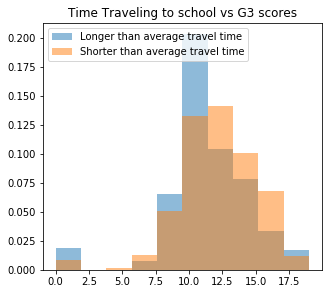

In [373]:
histvsdata(travelslonger, 'Longer than average travel time', 
         travelsshorter, 'Shorter than average travel time', 
         'Time Traveling to school vs G3 scores',
        'G3')

In [327]:
urban = df[df['address']=='U'] #create a filtered df with only information on students with divorced parents
rural = df[df['address']=='R'] #create a filtered df with only information on students with remarried parents
checksignificance(urban,rural)
checkp(urban,rural)

Difference of the means of the two datasets
Medu 0.469262387134
Fedu 0.338226045551
Dalc -0.0950765913481
Walc -0.034657023494
absences 0.742823772517 <--- potentially significant
freetime -0.0837114235659
famrel -0.0704033960739
failures -0.0822851623916
goout 0.0395422487759
studytime 0.111809891739
traveltime -0.561160774449 <--- potentially significant
G1 0.937435425183 <--- potentially significant
G2 0.978931764072 <--- potentially significant
G3 1.17697992004 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=4.9396179003815126, pvalue=1.1815530741426493e-06)
Fedu Ttest_indResult(statistic=3.6611761117525576, pvalue=0.00028666817533429858)
traveltime Ttest_indResult(statistic=-8.4027460229636439, pvalue=1.8008691118677609e-15)
G1 Ttest_indResult(statistic=4.0371880546768146, pvalue=6.5735799013991872e-05)
G2 Ttest_indResult(statistic=3.8126799041858259, pvalue=0.00016326250334985402)
G3 Ttest_indResult(statistic=4.0198827540583491, pvalue

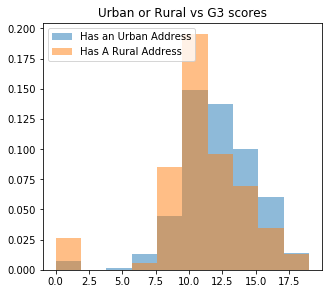

In [388]:
histvsdata(urban, 'Has an Urban Address', 
         rural, 'Has A Rural Address', 
         'Urban or Rural vs G3 scores',
        'G3')

In [329]:
goesoutsabvavgday = df[df['goout']>=df['goout'].mean()] #create a dataframe of students who goesout more than the mean
goesoutblwavgday = df[df['goout']<df['goout'].mean()] #create a dataframe of students who goesout less than the mean
checksignificance(goesoutsabvavgday,goesoutblwavgday)
checkp(goesoutsabvavgday,goesoutblwavgday)

Difference of the means of the two datasets
Medu 0.0313519790186
Fedu 0.0846963903181
Dalc 0.41526356884
Walc 0.926495024925 <--- potentially significant
absences 1.12048289255 <--- SIGNIFICANT
freetime 0.719503893972 <--- potentially significant
famrel 0.0870788203968
failures 0.0669683076738
goout 2.04377465014 <--- SIGNIFICANT
studytime -0.192276121644
traveltime 0.0668481851489
G1 -0.585787503253 <--- potentially significant
G2 -0.591823660133 <--- potentially significant
G3 -0.678301867905 <--- potentially significant

T-Statistic and pvalue for interesting data
Dalc Ttest_indResult(statistic=5.2316121279847998, pvalue=2.7434703184794615e-07)
Walc Ttest_indResult(statistic=8.9742702703987209, pvalue=9.1232914759782919e-18)
absences Ttest_indResult(statistic=2.9653783956148323, pvalue=0.0031666761455336413)
freetime Ttest_indResult(statistic=8.9937886780374896, pvalue=4.2327848085178511e-18)
goout Ttest_indResult(statistic=43.633056782055682, pvalue=1.8176310556049242e-193)
studyti

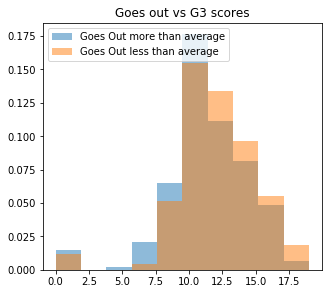

In [375]:
histvsdata(goesoutsabvavgday, 'Goes Out more than average', 
         goesoutblwavgday, 'Goes Out less than average', 
         'Goes out vs G3 scores',
        'G3')

In [331]:
studysabvavgday = df[df['studytime']>=df['studytime'].mean()] #create a dataframe of students who study more than the mean
studysblwavgday = df[df['studytime']<df['studytime'].mean()] #create a dataframe of students who study less than the mean
checksignificance(studysabvavgday,studysblwavgday)
checkp(studysabvavgday,studysblwavgday)

Difference of the means of the two datasets
Medu 0.217887828678
Fedu 0.161154527007
Dalc -0.346833038297
Walc -0.59228876128 <--- potentially significant
absences -1.01010319071 <--- SIGNIFICANT
freetime -0.12456284271
famrel 0.0371313846552
failures -0.167857605457
goout -0.103687232848
studytime 1.38215102975 <--- SIGNIFICANT
traveltime -0.136349898536
G1 1.32823496395 <--- SIGNIFICANT
G2 1.28801649324 <--- SIGNIFICANT
G3 1.57671300894 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Dalc Ttest_indResult(statistic=-4.1313744293578862, pvalue=4.5720746751040448e-05)
Walc Ttest_indResult(statistic=-5.3191576439801542, pvalue=1.8323227357969158e-07)
failures Ttest_indResult(statistic=-3.0422954147482639, pvalue=0.0025429979858265983)
studytime Ttest_indResult(statistic=45.844751348607453, pvalue=7.264605429738816e-169)
G1 Ttest_indResult(statistic=6.0580419791489204, pvalue=2.9531818295890654e-09)
G2 Ttest_indResult(statistic=5.5491196246402668, pvalue=4.9116526266792598e-0

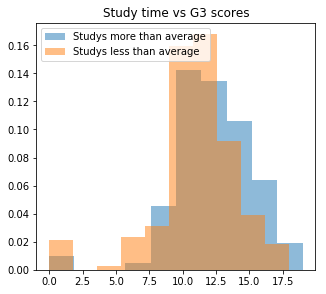

In [376]:
histvsdata(studysabvavgday, 'Studys more than average', 
         studysblwavgday, 'Studys less than average', 
         'Study time vs G3 scores',
        'G3')

In [333]:
divorced = df[df['Pstatus']=='A'] #create a filtered df with only information on students with divorced parents
married = df[df['Pstatus']=='T'] #create a filtered df with only information on students with remarried parents
checksignificance(divorced,married)
checkp(divorced,married)

Difference of the means of the two datasets
Medu 0.197166080844
Fedu 0.106502636204
Dalc -0.116695957821
Walc -0.277086994728
absences 1.65731546573 <--- SIGNIFICANT
freetime -0.120079086116
famrel -0.149033391916
failures 0.017816344464
goout -0.111094024605
studytime 0.0220562390158
traveltime -0.0924648506151
G1 -0.127262741652
G2 -0.165509666081
G3 0.00740333919156

T-Statistic and pvalue for interesting data


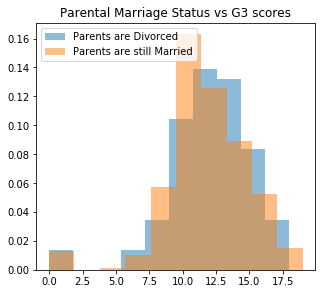

In [383]:
histvsdata(divorced, 'Parents are Divorced', 
         married, 'Parents are still Married', 
         'Parental Marriage Status vs G3 scores',
        'G3')

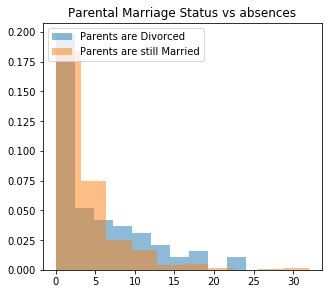

In [384]:
histvsdata(divorced, 'Parents are Divorced', 
         married, 'Parents are still Married', 
         'Parental Marriage Status vs absences',
        'absences')

In [336]:
drinksabvavgday = df[df['Dalc']>=df['Dalc'].mean()] #create a dataframe of students who drink more than the mean
drinksblwavgday = df[df['Dalc']<df['Dalc'].mean()] #create a dataframe of students who drink less than the mean
checksignificance(drinksabvavgday,drinksblwavgday)
checkp(drinksabvavgday,drinksblwavgday)

Difference of the means of the two datasets
Medu 0.0080068982508
Fedu 0.00209411185021
Dalc 1.64646464646 <--- SIGNIFICANT
Walc 1.68957871397 <--- SIGNIFICANT
absences 1.52204976595 <--- SIGNIFICANT
freetime 0.249322493225
famrel -0.249076127125
failures 0.080438531658
goout 0.555186006406 <--- potentially significant
studytime -0.263611727026
traveltime 0.10482877556
G1 -0.981276176398 <--- potentially significant
G2 -1.06750431141 <--- SIGNIFICANT
G3 -1.28923380143 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Dalc Ttest_indResult(statistic=24.153278277246731, pvalue=8.4981007474979955e-61)
Walc Ttest_indResult(statistic=18.564267216630501, pvalue=1.1252913681603069e-53)
absences Ttest_indResult(statistic=3.3206375704264621, pvalue=0.0010201672870663225)
freetime Ttest_indResult(statistic=2.7687344415511932, pvalue=0.0059126657580753405)
famrel Ttest_indResult(statistic=-2.9291111536760615, pvalue=0.0036308906152291657)
goout Ttest_indResult(statistic=5.77964234572225

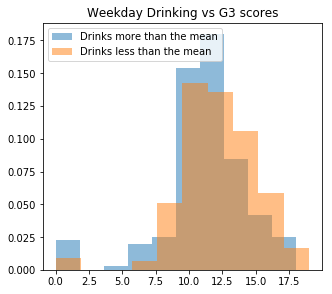

In [385]:
histvsdata(drinksabvavgday, 'Drinks more than the mean', 
         drinksblwavgday, 'Drinks less than the mean', 
         'Weekday Drinking vs G3 scores',
        'G3')

In [338]:
drinksabvavgend = df[df['Walc']>=df['Walc'].mean()]  #create a dataframe with students who drink more than the mean on weekends
drinksblwavgend = df[df['Walc']<df['Walc'].mean()] #create a dataframe with students who drink less than the mean on weekends
checksignificance(drinksabvavgend,drinksblwavgend)
checkp(drinksabvavgend,drinksblwavgend)

Difference of the means of the two datasets
Medu -0.0239294710327
Fedu 0.0825836631882
Dalc 0.936857782576 <--- potentially significant
Walc 2.32454719923 <--- SIGNIFICANT
absences 1.20538962856 <--- SIGNIFICANT
freetime 0.3150813642
famrel -0.13316140898
failures 0.110841229859
goout 0.800547758986 <--- potentially significant
studytime -0.27587861341
traveltime 0.0436008156411
G1 -0.801597297189 <--- potentially significant
G2 -0.854144176562 <--- potentially significant
G3 -1.07241813602 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Dalc Ttest_indResult(statistic=12.303858098584348, pvalue=1.6065631677242663e-28)
Walc Ttest_indResult(statistic=43.547792524794517, pvalue=1.4949729534288044e-150)
absences Ttest_indResult(statistic=3.1006568668938659, pvalue=0.0020512115184833663)
freetime Ttest_indResult(statistic=3.7514241014295688, pvalue=0.00019520027014666353)
goout Ttest_indResult(statistic=8.9546291582990527, pvalue=5.6489474455369814e-18)
studytime Ttest_indResu

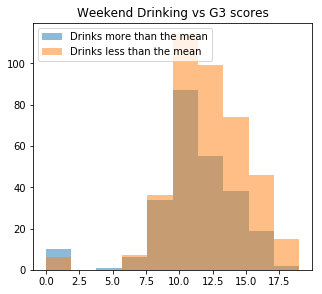

In [339]:
histvsdata(drinksabvavgend, 'Drinks more than the mean', 
         drinksblwavgend, 'Drinks less than the mean', 
         'Weekend Drinking vs G3 scores',
          'G3')

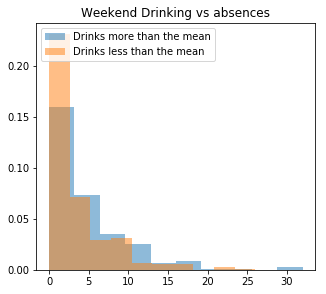

In [386]:
histvsdata(drinksabvavgend, 'Drinks more than the mean', 
         drinksblwavgend, 'Drinks less than the mean', 
         'Weekend Drinking vs absences',
          'absences')

In [341]:
moreeducatedfather = df[df['Fedu']>=df['Fedu'].mean()] #create a dataframe where the students fathers have about the mean level of education
lesseducatedfather = df[df['Fedu']<df['Fedu'].mean()] #create a dataframe where the students fathers have about the mean level of education
checksignificance(moreeducatedfather, lesseducatedfather)
checkp(moreeducatedfather, lesseducatedfather)

Difference of the means of the two datasets
Medu 1.36025146025 <--- SIGNIFICANT
Fedu 1.97625977626 <--- SIGNIFICANT
Dalc -0.026334026334
Walc 0.118018018018
absences 0.277536877537
freetime -0.0172953172953
famrel 0.0639837639838
failures -0.189327789328
goout 0.0456885456885
studytime 0.0511335511336
traveltime -0.258667458667
G1 1.01927531928 <--- SIGNIFICANT
G2 1.19084249084 <--- SIGNIFICANT
G3 1.23582813583 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=18.980566035181255, pvalue=2.7284723645944954e-63)
Fedu Ttest_indResult(statistic=47.889259267026262, pvalue=3.1862885489218502e-203)
failures Ttest_indResult(statistic=-4.5138617935750522, pvalue=7.6178899419115245e-06)
traveltime Ttest_indResult(statistic=-4.5351313452234416, pvalue=6.9214686650329706e-06)
G1 Ttest_indResult(statistic=4.7375315698340321, pvalue=2.7402242548095769e-06)
G2 Ttest_indResult(statistic=5.438684606928418, pvalue=7.707919531374789e-08)
G3 Ttest_indResult(stati

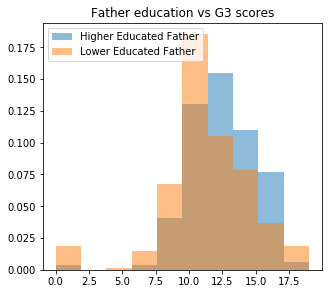

In [387]:
histvsdata(moreeducatedfather, 'Higher Educated Father', 
         lesseducatedfather, 'Lower Educated Father', 
         'Father education vs G3 scores',
          'G3')

In [343]:
moreeducatedmother = df[df['Medu']>=df['Medu'].mean()] #create a dataframe where the mother has an above mean education level
lesseducatedmother = df[df['Medu']<df['Medu'].mean()] #create a dataframe where the mother has a below mean education level
checksignificance(moreeducatedmother,lesseducatedmother)
checkp(moreeducatedmother,lesseducatedmother)

Difference of the means of the two datasets
Medu 2.02001140793 <--- SIGNIFICANT
Fedu 1.28158570206 <--- SIGNIFICANT
Dalc 0.081899420097
Walc 0.067525430174
absences 0.0427226922711
freetime -0.0222549672022
famrel 0.0294419621637
failures -0.127531134138
goout 0.0489970529518
studytime 0.121988782204
traveltime -0.379627341002
G1 1.12716037646 <--- SIGNIFICANT
G2 1.26472098108 <--- SIGNIFICANT
G3 1.26797224071 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=49.883579163400569, pvalue=6.739030759741695e-224)
Fedu Ttest_indResult(statistic=18.109437955912114, pvalue=8.7380393032704412e-59)
failures Ttest_indResult(statistic=-2.7664297918492977, pvalue=0.0058312614946881246)
traveltime Ttest_indResult(statistic=-6.7371588424419491, pvalue=3.7524563861557361e-11)
G1 Ttest_indResult(statistic=5.3110681872821672, pvalue=1.5219965474107441e-07)
G2 Ttest_indResult(statistic=5.6478235342939591, pvalue=2.4472647255987207e-08)
G3 Ttest_indResult(statis

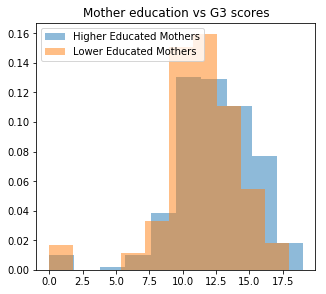

In [379]:
histvsdata(moreeducatedmother, 'Higher Educated Mothers', 
         lesseducatedmother, 'Lower Educated Mothers', 
         'Mother education vs G3 scores',
          'G3')

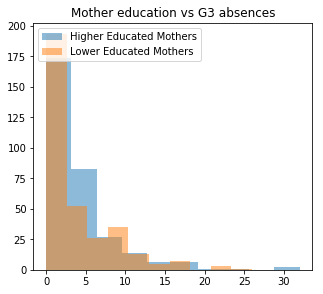

In [345]:
histvsdata(moreeducatedmother, 'Higher Educated Mothers', 
         lesseducatedmother, 'Lower Educated Mothers', 
         'Mother education vs G3 absences',
          'absences')

In [346]:
stayathomemom = df[df['Mjob']=='at_home'] #create a dataframe of students where the mother is a stay at home mom
notstayathomemom = df[df['Mjob']!='at_home'] #create a dataframe of students where the mother is a working mom
checksignificance(stayathomemom,notstayathomemom)  
checkp(stayathomemom,notstayathomemom)  

Difference of the means of the two datasets
Medu -1.05198155354 <--- SIGNIFICANT
Fedu -0.536806456262 <--- potentially significant
Dalc -0.00759475428736
Walc -0.0267329586396
absences -0.112509007062
freetime -0.0592736705577
famrel -0.0246865542585
failures 0.140726329442
goout -0.111874909929
studytime -0.080804150454
traveltime 0.32027669693
G1 -1.19600807033 <--- SIGNIFICANT
G2 -1.08460873325 <--- SIGNIFICANT
G3 -1.0878512754 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=-11.662558746643592, pvalue=2.0777077613134481e-25)
Fedu Ttest_indResult(statistic=-5.3769789654843079, pvalue=1.9073132443592879e-07)
traveltime Ttest_indResult(statistic=4.0800936347190362, pvalue=6.6499692264327854e-05)
G1 Ttest_indResult(statistic=-4.3774211444876157, pvalue=1.9392973066816803e-05)
G2 Ttest_indResult(statistic=-3.7675331741172213, pvalue=0.00021640841286879863)
G3 Ttest_indResult(statistic=-3.5649400207001221, pvalue=0.00044881920393070759)


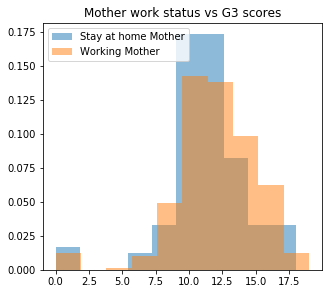

In [380]:
histvsdata(stayathomemom, 'Stay at home Mother', 
         notstayathomemom, 'Working Mother', 
         'Mother work status vs G3 scores',
          'G3')

In [348]:
mominheathcare = df[df['Mjob']=='health']
mominservices = df[df['Mjob']=='services'] 
mominteaching = df[df['Mjob']=='teacher'] 
mominother = df[df['Mjob']=='other'] 
momathome = df[df['Mjob']=='at_home'] 


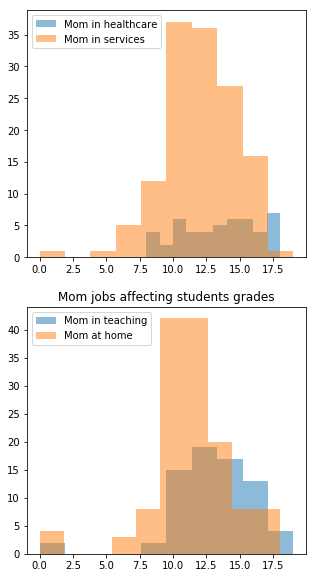

In [382]:
    plt.figure(figsize=(5,10))
    plt.subplot(2, 1, 1)
    plt.hist(mominheathcare['G3'], label = 'Mom in healthcare', alpha = 0.5)
    plt.hist(mominservices['G3'], label = 'Mom in services', alpha = 0.5)
    plt.legend(loc='upper left')
    plt.subplot(2, 1, 2)
    plt.hist(mominteaching['G3'], label = 'Mom in teaching', alpha = 0.5)
    #plt.hist(mominother['G3'], label = 'Mom in other', alpha = 0.5)
    plt.hist(momathome['G3'], label = 'Mom at home', alpha = 0.5)
    plt.title('Mom jobs affecting students grades')
    plt.legend(loc='upper left')
    plt.show()

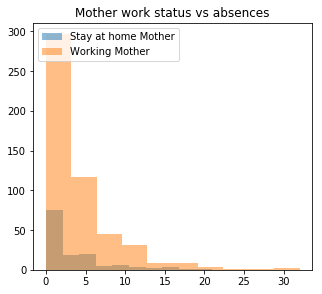

In [350]:
histvsdata(stayathomemom, 'Stay at home Mother', 
         notstayathomemom, 'Working Mother', 
         'Mother work status vs absences',
          'absences')

In [351]:
Boys = df[df['sex']=='M']#create a dataframe of just Boys
Girls = df[df['sex']=='F']#create a dataframe of just Girls
checksignificance(Boys,Girls)
checkp(Boys,Girls)

Difference of the means of the two datasets
Medu 0.274602956477
Fedu 0.187528220028
Dalc 0.531194173423 <--- potentially significant
Walc 0.837099275604 <--- potentially significant
absences 0.201171990027
freetime 0.312442332987
famrel 0.162086024461
failures 0.0890575001472
goout 0.138979956418
studytime -0.347543139834
traveltime 0.062182217947
G1 -0.580684740572 <--- potentially significant
G2 -0.615687390801 <--- potentially significant
G3 -0.847248669978 <--- potentially significant

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=3.0499298692725909, pvalue=0.0023955025905865166)
Dalc Ttest_indResult(statistic=6.8495770370513736, pvalue=2.9147446205702832e-11)
Walc Ttest_indResult(statistic=8.1871368869897285, pvalue=2.6225907608887861e-15)
freetime Ttest_indResult(statistic=3.7289236989307368, pvalue=0.00021215660750321743)
studytime Ttest_indResult(statistic=-5.3321058549703571, pvalue=1.4110408941375097e-07)
G1 Ttest_indResult(statistic=-2.6898433099

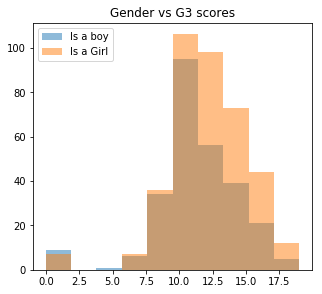

In [352]:
histvsdata(Boys, 'Is a boy', 
         Girls, 'Is a Girl', 
         'Gender vs G3 scores',
        'G3')

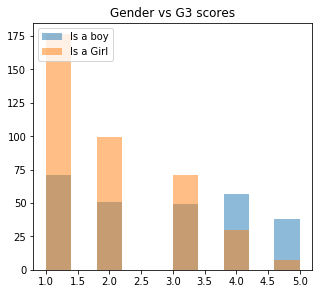

In [353]:
histvsdata(Boys, 'Is a boy', 
         Girls, 'Is a Girl', 
         'Gender vs G3 scores',
        'Walc')

In [354]:
aftrschlactive = df[df['activities']=='yes']  #create a dataframe where students have after school activities
noaftrschlactive = df[df['activities']=='no'] #create a dataframe where students dont have after school activities
checksignificance(aftrschlactive,noaftrschlactive)
checkp(aftrschlactive,noaftrschlactive)

Difference of the means of the two datasets
Medu 0.270734721034
Fedu 0.175268510598
Dalc 0.0417735956658
Walc 0.0842885657257
absences -0.140243322878
freetime 0.315911035073
famrel 0.11005607832
failures 0.000665335994677
goout 0.208231156734
studytime 0.11622469347
traveltime -0.0499572284003
G1 0.439768082882
G2 0.39118905047
G3 0.38619903051

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=3.0568527373914764, pvalue=0.0023293692715440867)
freetime Ttest_indResult(statistic=3.8757599152195601, pvalue=0.00011713157860848002)


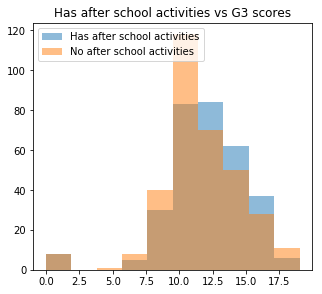

In [355]:
histvsdata(aftrschlactive, 'Has after school activities', 
         noaftrschlactive, 'No after school activities', 
         'Has after school activities vs G3 scores',
        'G3')

In [356]:
haveinternet = df[df['internet']=='yes'] #create a dataframe where students have internet at home
nointernet = df[df['internet']=='no'] #create a dataframe where students dont have internet at home
checksignificance(haveinternet,nointernet)
checkp(haveinternet,nointernet)

Difference of the means of the two datasets
Medu 0.713835474348 <--- potentially significant
Fedu 0.477273331738
Dalc 0.0936328093832
Walc 0.184220325009
absences 0.738610069417 <--- potentially significant
freetime 0.157264820873
famrel 0.185816112131
failures -0.133740259049
goout 0.258224952791
studytime 0.0736189792282
traveltime -0.337854730179
G1 0.908455012101 <--- potentially significant
G2 1.01914944546 <--- SIGNIFICANT
G3 1.14620069683 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=7.2618486754085536, pvalue=4.3708002544897434e-12)
Fedu Ttest_indResult(statistic=5.0718416850644958, pvalue=7.2311981022397635e-07)
traveltime Ttest_indResult(statistic=-4.3444831158549251, pvalue=2.1786423092660076e-05)
G1 Ttest_indResult(statistic=3.4173429241413822, pvalue=0.00074751198088436849)
G2 Ttest_indResult(statistic=3.5088908199426516, pvalue=0.00054496781059790362)
G3 Ttest_indResult(statistic=3.6580076109100679, pvalue=0.00031532887739329

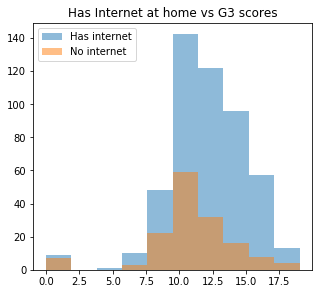

In [357]:
histvsdata(haveinternet, 'Has internet', 
         nointernet, 'No internet', 
         'Has Internet at home vs G3 scores',
        'G3')

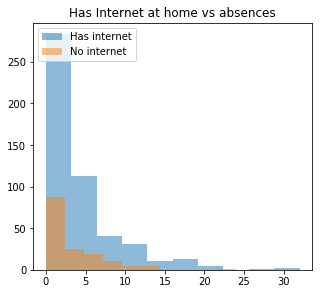

In [358]:
histvsdata(haveinternet, 'Has internet', 
         nointernet, 'No internet', 
         'Has Internet at home vs absences',
        'absences')

In [359]:
wantshigher = df[df['higher']=='yes']  #create a dataframe where students want to get higher education
nohigherdesire = df[df['higher']=='no'] #create a dataframe where students dont want to get higher education
checksignificance(wantshigher,nohigherdesire)
checkp(wantshigher,nohigherdesire)

Difference of the means of the two datasets
Medu 0.78668165917 <--- potentially significant
Fedu 0.683658170915 <--- potentially significant
Dalc -0.394727636182
Walc -0.351099450275
absences -1.95407296352 <--- SIGNIFICANT
freetime -0.349650174913
famrel 0.149450274863
failures -0.595002498751 <--- potentially significant
goout -0.263393303348
studytime 0.506221889055 <--- potentially significant
traveltime -0.174637681159
G1 3.10612193903 <--- SIGNIFICANT
G2 3.13533233383 <--- SIGNIFICANT
G3 3.47876061969 <--- SIGNIFICANT

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=7.015797456290616, pvalue=2.7809841482373073e-10)
Fedu Ttest_indResult(statistic=6.4591080212454504, pvalue=3.5545319904925171e-09)
Dalc Ttest_indResult(statistic=-2.6413768631564434, pvalue=0.0099989942893842221)
absences Ttest_indResult(statistic=-2.6687971272593058, pvalue=0.0092694650871488898)
failures Ttest_indResult(statistic=-5.0624321586289289, pvalue=3.0362241393871087e-06)
studyti

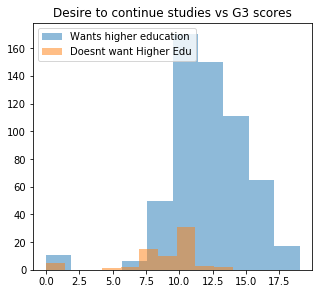

In [360]:
histvsdata(wantshigher, 'Wants higher education', 
         nohigherdesire, 'Doesnt want Higher Edu', 
         'Desire to continue studies vs G3 scores',
        'G3')

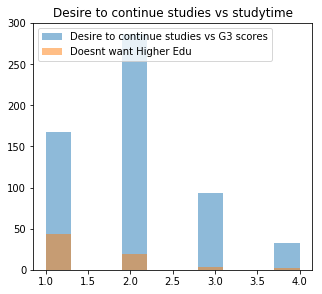

In [361]:
histvsdata(wantshigher, 'Desire to continue studies vs G3 scores', 
         nohigherdesire, 'Doesnt want Higher Edu', 
         'Desire to continue studies vs studytime',
        'studytime')

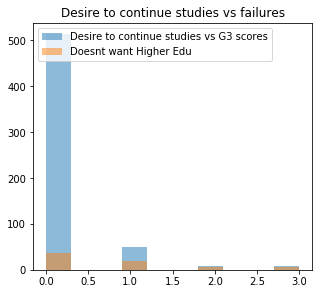

In [362]:
histvsdata(wantshigher, 'Desire to continue studies vs G3 scores', 
         nohigherdesire, 'Doesnt want Higher Edu', 
         'Desire to continue studies vs failures',
        'failures')

In [363]:
romantic = df[df['romantic']=='yes']  #create a dataframe where students have romantic relationships
noromantic = df[df['romantic']=='no'] #create a dataframe where students dont have romantic relationships
checksignificance(romantic,noromantic)
checkp(romantic,noromantic)

Difference of the means of the two datasets
Medu -0.0728441677722
Fedu -0.154209613226
Dalc 0.118869272375
Walc -0.0531380753138
absences 0.764210633738 <--- potentially significant
freetime 0.0590366363915
famrel -0.0889376466986
failures 0.085906725176
goout -0.0012654352485
studytime 0.0567710990917
traveltime 0.00736809878559
G1 -0.426390448005
G2 -0.591152158384 <--- potentially significant
G3 -0.606255740382 <--- potentially significant

T-Statistic and pvalue for interesting data


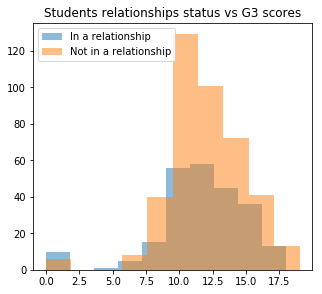

In [364]:
histvsdata(romantic, 'In a relationship', 
         noromantic, 'Not in a relationship', 
         'Students relationships status vs G3 scores',
        'G3')

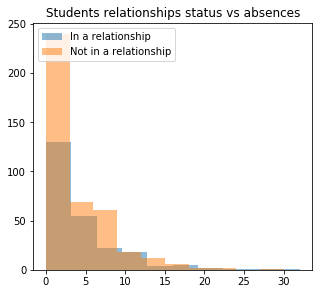

In [365]:
histvsdata(romantic, 'In a relationship', 
         noromantic, 'Not in a relationship', 
         'Students relationships status vs absences',
        'absences')

In [366]:
nursery = df[df['nursery']=='yes'] #create a dataframe where students went to nursury school
nonursery = df[df['nursery']=='no']
checksignificance(nursery,nonursery)
checkp(nursery,nonursery)

Difference of the means of the two datasets
Medu 0.358850167946
Fedu 0.206783829175
Dalc -0.18202675144
Walc -0.244316818618
absences -0.472843690019
freetime -0.0187290067179
famrel 0.0985334692898
failures -0.103151991363
goout 0.0551523512476
studytime 0.0888015834933
traveltime -0.0216380758157
G1 0.214896233205
G2 0.29170165547
G3 0.233265355086

T-Statistic and pvalue for interesting data
Medu Ttest_indResult(statistic=3.3636613499751791, pvalue=0.00091827745269894702)


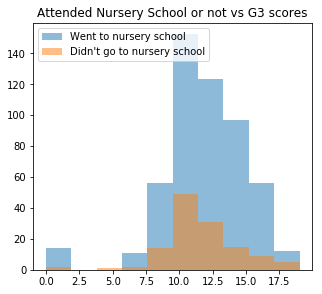

In [367]:
histvsdata(nursery, 'Went to nursery school', 
         nonursery, 'Didn\'t go to nursery school', 
         'Attended Nursery School or not vs G3 scores',
        'G3')

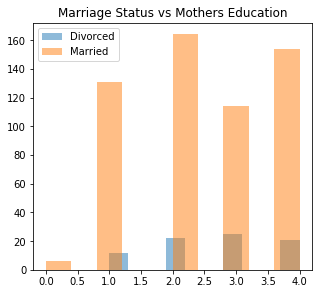

In [368]:
histvsdata(divorced, 'Divorced', 
         married, 'Married', 
         'Marriage Status vs Mothers Education',
          'Medu')

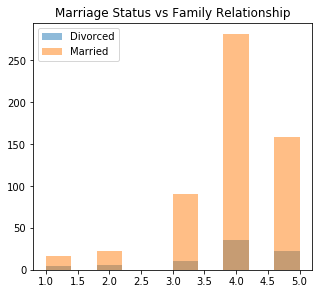

In [369]:
histvsdata(divorced, 'Divorced', 
         married, 'Married', 
         'Marriage Status vs Family Relationship',
          'famrel')

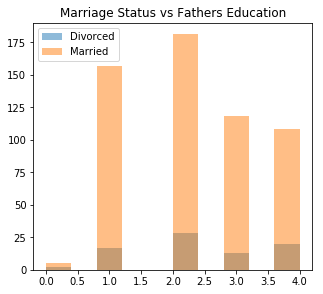

In [370]:
histvsdata(divorced, 'Divorced', 
         married, 'Married', 
         'Marriage Status vs Fathers Education',
          'Fedu')

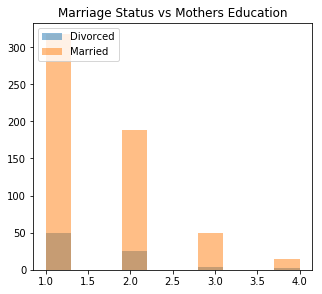

In [371]:
histvsdata(divorced, 'Divorced', 
         married, 'Married', 
         'Marriage Status vs Mothers Education',
          'traveltime')